In [150]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
%autoreload 2

In [152]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [200]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2015-09-28/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 1987
files_end = 2173


In [201]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111","Te" : "125", "Xe" : "129"}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124"], ["117", "118", "119", "122", "124"]]
isotopes = [["112", "114", "115", "116", "117", "118", "119", "122", "124"]]
#isotopes = [["116", "117", "118", "119", "122", "124"]]
denom_isotope = "120"
isotope_column = ["112", "114", "115", "116", "117", "118", "119", "122", "124"]
data_sample_column = [(i + "/" + "120") for i in isotope_column]
print data_sample_column
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = True

blk_corr = False

['112/120', '114/120', '115/120', '116/120', '117/120', '118/120', '119/120', '122/120', '124/120']


In [202]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "teflon blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2015-09-28 21:55:00,1,blank sol,0.000244,0.000154,0.003807,0.000312,0.000779,0.000251,0.000515,0.000004,...,0.000073,-2.102090e-05,0.000401,0.000034,0.000274,0.000089,0.004689,0.000471,0.001403,0.000430
2015-09-28 21:55:00,2,blank sol,0.000268,0.000170,0.003848,0.000274,0.000736,0.000233,0.000529,0.000026,...,0.000066,3.076410e-05,0.000257,0.000061,0.000193,0.000113,0.003979,0.000319,0.000882,0.000275
2015-09-28 21:55:00,3,blank sol,0.000265,0.000186,0.003932,0.000300,0.000831,0.000253,0.000533,0.000018,...,0.000067,6.656200e-06,0.000206,0.000067,0.000119,0.000074,0.003742,0.000238,0.000670,0.000219
2015-09-28 21:55:00,4,blank sol,0.000217,0.000126,0.003657,0.000256,0.000620,0.000208,0.000435,0.000052,...,0.000032,3.344400e-05,0.000261,0.000067,0.000158,0.000061,0.003972,0.000291,0.000892,0.000258
2015-09-28 21:55:00,5,blank sol,0.000240,0.000158,0.003847,0.000274,0.000772,0.000227,0.000479,0.000026,...,0.000055,2.540620e-05,0.000386,0.000077,0.000290,0.000090,0.004654,0.000470,0.001366,0.000457
2015-09-28 21:55:00,6,blank sol,0.000202,0.000103,0.003564,0.000247,0.000627,0.000173,0.000397,0.000016,...,0.000066,3.612250e-05,0.000209,0.000076,0.000108,0.000081,0.003666,0.000213,0.000620,0.000206
2015-09-28 21:55:00,7,blank sol,0.000293,0.000182,0.004022,0.000310,0.000861,0.000284,0.000532,0.000005,...,0.000083,-1.030820e-05,0.000229,0.000072,0.000136,0.000099,0.003795,0.000273,0.000701,0.000247
2015-09-28 21:55:00,8,blank sol,0.000248,0.000119,0.003680,0.000263,0.000652,0.000216,0.000413,0.000064,...,0.000054,-1.655480e-05,0.000175,0.000064,0.000112,0.000087,0.003606,0.000206,0.000592,0.000189
2015-09-28 21:55:00,9,blank sol,0.000258,0.000164,0.003825,0.000296,0.000753,0.000233,0.000491,0.000017,...,0.000060,1.290700e-05,0.000245,0.000080,0.000143,0.000103,0.003711,0.000253,0.000665,0.000223


In [212]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    #blk1 = [item for item in blk_ls if item < sample]
    #blk2 = [item for item in blk_ls if item > sample]
    #blk1 = blk1[-1]
    #blk2 = blk2[0]
    #blk_corr_sample = True
    
    # blank measurement surrounds sample
    if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
        blk1 = sample-1
        blk2 = sample+1
        blk_corr_sample = True
    else:
        blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = data_sample_raw[np.abs(data_sample_raw-data_sample_raw.mean())<=(2*data_sample_raw.std())]
    
    data_sample = new_corr.mass_fractionation(denom_isotope, 10)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = data_sample[np.abs(data_sample-data_sample.mean())<=(2*data_sample.std())]
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [214]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [215]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SE])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:]
df_internal_norm_mean
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2015-09-28 22:06:00,0.029842,0.020202,0.010360,0.446002,0.235274,0.742798,0.263400,0.142046,0.177514,0.259414,...,7.042656,2.532743,9.750259,1.423634,1.827964,0.000037,0.000077,0.000010,0.000038,NIST 100ppb
2015-09-28 22:29:00,0.029842,0.020205,0.010361,0.446003,0.235273,0.742798,0.263401,0.142044,0.177516,0.257998,...,7.004851,2.519197,9.698215,1.416075,1.818335,0.000038,0.000084,0.000010,0.000041,NIST 100ppb
2015-09-28 22:52:00,0.029845,0.020202,0.010363,0.446002,0.235279,0.742799,0.263400,0.142048,0.177520,0.248775,...,6.752957,2.428546,9.349166,1.365090,1.752812,0.000036,0.000084,0.000010,0.000043,NIST 100ppb
2015-09-28 23:14:00,0.029845,0.020203,0.010362,0.446003,0.235275,0.742802,0.263398,0.142046,0.177518,0.242758,...,6.590990,2.370345,9.125415,1.332482,1.711054,0.000046,0.000074,0.000013,0.000038,NIST 100ppb
2015-09-28 23:37:00,0.029845,0.020204,0.010362,0.446002,0.235279,0.742802,0.263396,0.142045,0.177514,0.247337,...,6.715370,2.415086,9.297753,1.357634,1.743344,0.000025,0.000080,0.000007,0.000041,NIST 100ppb
2015-09-29 00:00:00,0.029847,0.020203,0.010363,0.446002,0.235275,0.742796,0.263396,0.142046,0.177512,0.242856,...,6.593340,2.371195,9.128776,1.332976,1.711630,0.000037,0.000062,0.000011,0.000032,NIST 100ppb
2015-09-29 00:23:00,0.029844,0.020203,0.010361,0.446002,0.235282,0.742800,0.263394,0.142042,0.177511,0.236124,...,6.411208,2.305674,8.876693,1.296155,1.664387,0.000034,0.000087,0.000010,0.000047,NIST 100ppb
2015-09-29 00:45:00,0.029846,0.020204,0.010363,0.446002,0.235279,0.742797,0.263396,0.142042,0.177513,0.238181,...,6.467812,2.326138,8.955536,1.307734,1.679359,0.000032,0.000088,0.000009,0.000047,NIST 100ppb
2015-09-29 01:07:00,0.029844,0.020201,0.010361,0.446003,0.235279,0.742803,0.263395,0.142044,0.177507,0.236723,...,6.427083,2.311348,8.898339,1.299281,1.668332,0.000042,0.000079,0.000012,0.000042,NIST 100ppb


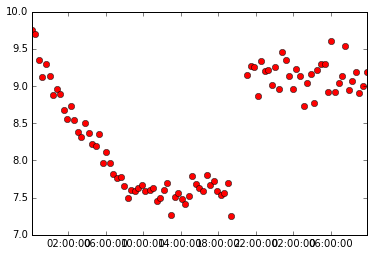

In [216]:
#plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = df_internal_norm_mean[(df_internal_norm_mean["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/120"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [187]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "NIST 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
#epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon_NIST["sample"] = sample
epsilon_2["sample"] = sample

epsilon_NIST = epsilon_NIST[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 100ppb"]
epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon_comp

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
0,-0.619074,0.374090,-0.737332,-1.110223e-12,-0.072158,-0.049395,0.097590,-0.117807,-0.200106,153.604286,...,155.049134,155.252355,155.400875,155.595785,155.957853,535.097333,412.974398,364.819333,213.534770,NIST 100ppb
1,0.382650,-0.906894,1.396366,2.220446e-12,0.157513,0.029682,-0.037271,0.133115,0.182986,-64.014157,...,-66.127376,-66.335882,-66.569555,-66.890232,-67.317811,-1572.204433,701.031778,-1547.548910,787.814221,NIST 100ppb
2,-0.591699,-1.089804,-0.950543,0.000000e+00,-0.149527,0.031753,0.082888,0.070702,0.201673,-213.332937,...,-212.514366,-212.444365,-212.362708,-212.019897,-211.678272,5387.992388,-1049.040888,5739.519103,-846.970336,NIST 100ppb
3,1.267445,2.284675,0.073064,0.000000e+00,0.186906,0.003685,-0.054963,-0.181539,-0.073548,186.668780,...,186.871800,186.926977,187.006872,186.853532,186.975768,-4104.035514,1828.496725,-4213.417640,1600.291505,NIST 100ppb
4,-0.575886,-1.156623,1.361448,0.000000e+00,-0.257878,-0.067508,0.028226,0.126433,-0.162532,46.289480,...,45.867213,45.898535,45.822211,45.887458,45.630855,2663.076221,-2590.540424,2519.850809,-2642.174094,NIST 100ppb
5,-0.994610,-0.567813,-1.817208,2.220446e-12,0.169864,0.057689,-0.109684,0.008835,0.010730,-182.556973,...,-182.571446,-182.847104,-182.818008,-183.053550,-183.254102,-134.881029,1650.842179,102.955641,1855.497346,NIST 100ppb
6,1.773291,2.463358,1.185809,0.000000e+00,-0.028397,-0.084252,0.112182,-0.110957,0.253367,74.042237,...,75.441287,75.995116,76.174007,76.817705,77.627669,-1638.875563,575.569149,-1734.071414,496.745580,NIST 100ppb
7,-1.326896,-2.206742,-0.721759,0.000000e+00,0.089726,0.064815,-0.020740,-0.016117,-0.376350,94.948343,...,94.283492,93.983744,93.849403,93.436903,92.934261,2011.247154,-118.926890,1900.240293,-185.820164,NIST 100ppb
8,-0.530657,0.104271,1.490020,-1.110223e-12,-0.020471,-0.116131,-0.091772,-0.235421,-0.048651,-174.847540,...,-172.727576,-172.479909,-172.077439,-170.212799,-168.765482,-1798.193190,205865.222741,-1632.780901,209787.281722,NIST 100ppb + Te 0.1ppb
9,0.011155,-0.550986,0.927028,0.000000e+00,0.110465,0.058910,0.037159,-0.128967,0.031793,-15.400428,...,-24.554544,-24.654057,-24.793829,-25.107939,-25.278684,30091.663538,-472.806157,30160.570710,-451.825428,NIST 100ppb + Cd 0.01ppb


In [188]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon_comp.drop(["112", "114", "115", "116", "117", "118", "119", "120", "122", "124"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2, np.size]), decimals=2)
epsilon_sum

112/120            114/120            115/120        \
                            mean   SD2 size    mean   SD2 size    mean   SD2   
sample                                                                         
NIST 100ppb                -0.00  2.06   81   -0.09  3.45   81   -0.04  3.02   
NIST 100ppb + Cd 0.01ppb    0.05  0.24    3    1.30  2.62    3    1.05  0.58   
NIST 100ppb + Cd 0.02ppb    1.19  0.53    2    1.55  0.29    2   -0.18  4.25   
NIST 100ppb + Cd 0.03ppb   -0.32  1.86    2   -0.18  3.84    2    0.74  0.08   
NIST 100ppb + Cd 0.05ppb    0.75  0.30    2    3.43  0.53    2   -0.67  3.56   
NIST 100ppb + Cd 0.07ppb    0.01  0.39    2    3.31  4.82    2   -1.03  1.49   
NIST 100ppb + Te 0.1ppb    -0.71  1.00    3    0.44  0.69    3    0.29  3.44   
NIST 100ppb + Te 0.2ppb    -0.80  1.66    2   -0.79  0.38    2   -0.19  0.74   
NIST 100ppb + Te 0.5ppb    -1.18  0.88    2   -1.34  2.47    2    0.70  3.99   
NIST 100ppb + Te 1.5ppb     0.28  0.40    2    2.21  0.71    2   -0.66  1.28   
NIST 100ppb + Te 1ppb       0.83  1.19    2    1.57  1.62    2   -2.69  1.34   
NIST 100ppb + Te 2ppb      -1.45  1.09    2   -1.27  0.57    2   -0.32  1.38   
NIST 100ppb + U 0.001ppb   -0.88  2.32    3    0.98  2.21    3   -0.32  2.03   
NIST 100ppb + U 0.003ppb   -0.08  2.08    2   -0.80  2.64    2    0.35  2.39   
NIST 100ppb + U 0.005ppb   -0.70  1.32    2   -2.08  0.54    2   -0.22  1.18   
NIST 100ppb + U 0.01ppb     1.41  2.39    2    1.90  1.41    2   -0.36  0.08   

                              116/120 ...   111         125                  \
                         size    mean ...  size        mean        SD2 size   
sample                                ...                                     
NIST 100ppb                81       0 ...    81     -394.59    5251.90   81   
NIST 100ppb + Cd 0.01ppb    3      -0 ...     3     -485.44    1049.03    3   
NIST 100ppb + Cd 0.02ppb    2       0 ...     2     1768.24    2099.64    2   
NIST 100ppb + Cd 0.03ppb    2       0 ...     2     -894.27    2555.03    2   
NIST 100ppb + Cd 0.05ppb    2       0 ...     2     2112.20    1972.13    2   
NIST 100ppb + Cd 0.07ppb    2       0 ...     2     1398.91    2031.80    2   
NIST 100ppb + Te 0.1ppb     3       0 ...     3   216816.30   24013.63    3   
NIST 100ppb + Te 0.2ppb     2       0 ...     2   463481.78  141987.98    2   
NIST 100ppb + Te 0.5ppb     2       0 ...     2  1066668.17  213719.36    2   
NIST 100ppb + Te 1.5ppb     2       0 ...     2  3192976.11  476872.64    2   
NIST 100ppb + Te 1ppb       2      -0 ...     2  2154659.99  347030.56    2   
NIST 100ppb + Te 2ppb       2       0 ...     2  4577123.15  660661.03    2   
NIST 100ppb + U 0.001ppb    3       0 ...     3      -95.86    4811.63    3   
NIST 100ppb + U 0.003ppb    2       0 ...     2      213.83    1910.05    2   
NIST 100ppb + U 0.005ppb    2       0 ...     2     1769.62    2117.92    2   
NIST 100ppb + U 0.01ppb     2      -0 ...     2     -187.92    3036.36    2   

                              Cd/Sn                      Te/Sn                  
                               mean       SD2 size        mean        SD2 size  
sample                                                                          
NIST 100ppb                  293.05   5563.67   81     -380.90    5320.59   81  
NIST 100ppb + Cd 0.01ppb   28007.45   9028.76    3     -534.43    1241.71    3  
NIST 100ppb + Cd 0.02ppb   58060.73   7751.70    2     1662.14    2519.53    2  
NIST 100ppb + Cd 0.03ppb  121794.92  35413.29    2     -995.07    2348.72    2  
NIST 100ppb + Cd 0.05ppb  146292.52  28121.58    2     1990.85    2217.20    2  
NIST 100ppb + Cd 0.07ppb  299637.36  90798.48    2     1378.26    2105.38    2  
NIST 100ppb + Te 0.1ppb     -322.29   2146.03    3   209744.97    2479.90    3  
NIST 100ppb + Te 0.2ppb      908.72    796.87    2   460849.25  136188.32    2  
NIST 100ppb + Te 0.5ppb     3114.70   2798.95    2  1067301.56  214062.21    2  
NIST 100ppb + Te 1.5ppb    -27

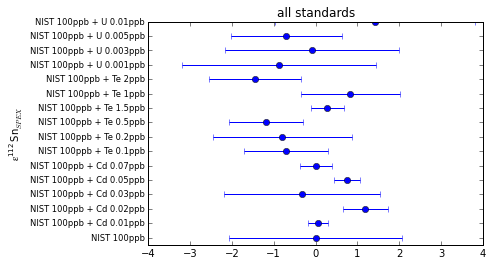

In [193]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/120"]["mean"], x, xerr = epsilon_sum["112/120"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

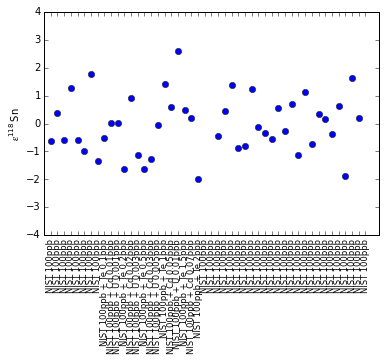

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [194]:
df_all.to_csv(path_sav + "Sn_H9_L4_1_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [195]:
df_internal_sub.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm.csv", mode='a', header=False)

In [217]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_mean_uncorr_only_mass_frac.csv", mode='w', header=True)

In [1226]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
